打开任何一本地震数据处理的教材，都会有正常时差校正(Normal-Moveout Corrention)的章节。我们对共中心点剖面应用NMO可将双曲型的反射剖面校正为水平剖面，但是课本上只是列出公式，具体怎么做呢？

$$
t_0^2 = t^2 - \frac{x^2}{v_{NMO}^2}
$$

这里，$v_{NMO}$ 为NMO 速度，$x$ 为炮点和接收点之间的距离（offset），$v$ 为反射界面之上的地层速度。$t_0$ 为垂直路线MD的双程旅行时。只有反射界面为水平时，深度点D在地表的投影才与中心点M重合。

![CMP](http://wiki.seg.org/images/d/df/Ch03_fig1-1.png)


上述公式将走时联系在一起，我们可以测量的$t$ 以及我们想知道的$t_0$。
但实际上，CMP道集的数据是时间t和offset函数的振幅矩阵。NMO校正后的道集同样如此。
因此我们做NMO校正实际上是将一种振幅转换为另一种振幅，但是我们的公式中却压根儿没有振幅！！

这就是公式和实际实现NMO校正的差异。

In [11]:
%matplotlib inline
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [2]:
data = np.load('data/synthetic_cmp.npz')
print("Data in the archive:", data.keys())

Data in the archive: ['dt', 'offsets', 'CMP']


In [3]:
dt = data['dt']
offsets = data['offsets']
cmp = data['CMP']
nsamples = cmp.shape[0]
noffsets = cmp.shape[1]
print('dt = {} s'.format(dt))
print('offsets =', offsets)
print('N samples = {}'.format(nsamples))
print('N offsets = {}'.format(noffsets))

dt = 0.00045678391959799 s
offsets = [120 180 240 300 360 420 480 540 600 660 720 780 840 900]
N samples = 1200
N offsets = 14


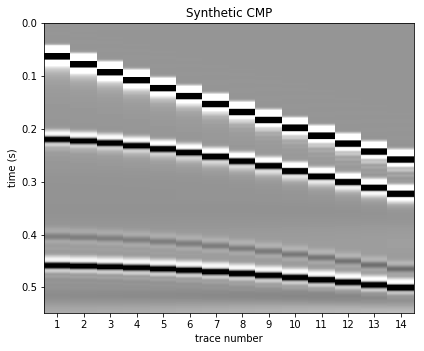

In [15]:
fig = plt.figure(figsize=(6,5))
ax = plt.subplot(111)
ax.set_title('Synthetic CMP')
ax.set_xlabel('trace number')
ax.set_ylabel('time (s)')
cutoff = 0.1
ax.imshow(cmp, extent=[0.5, noffsets + 0.5, dt*nsamples, 0], 
          aspect=20, cmap='Greys', vmin=-cutoff, vmax=cutoff, 
          interpolation='none')

trace_numbers = list(range(1, noffsets + 1))
ax.set_xticks(trace_numbers)
fig.tight_layout()

1. 直达波
2. 第一界面反射波
3. 第一个界面多次波
4. 第二个界面的反射波

In [16]:
%pwd

'/home/pzhang/Desktop/Workspace/SEG_Tutorial/nmo_tutorial'